In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns

In [2]:
cd bank fears loneliness

/home/sanyam/Documents/bank fears loneliness


In [3]:
train=pd.read_csv('train_indessa.csv')
train.shape
tr_data=train.copy()

In [4]:
test=pd.read_csv('test_indessa.csv')
test.shape
tt_data=test.copy()

In [5]:
data_types=train.dtypes

In [6]:
data_types

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
batch_enrolled                  object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

In [7]:
missing=train.isnull().sum(axis=0)/train.shape[0]

In [8]:
missing

member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
batch_enrolled                 0.159926
int_rate                       0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.057905
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000006
verification_status            0.000000
pymnt_plan                     0.000000
desc                           0.858011
purpose                        0.000000
title                          0.000169
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000030
inq_last_6mths                 0.000030
mths_since_last_delinq         0.511908
mths_since_last_record         0.845758


In [9]:
unique={}
for  col in train.columns:
    if train.dtypes[col]=='object':
        unique[col]=train[col].unique()
        

In [24]:
dictionary={'missing':missing,'type':data_types}
info_train=pd.DataFrame(dictionary)


In [25]:
info_train

,missing,type
member_id,0.000000,int64
loan_amnt,0.000000,int64
funded_amnt,0.000000,int64
funded_amnt_inv,0.000000,float64
term,0.000000,object
batch_enrolled,0.159926,object
int_rate,0.000000,float64
grade,0.000000,object
sub_grade,0.000000,object
emp_title,0.057905,object


In [16]:
def impute_missing(df):
    miss=df.isnull().sum()
    dtype=df.dtypes
    for col in df.columns:
        if miss[col]>0:
            if dtype[col]=='object':
                df[col].fillna('None',inplace=True)
            else:
                df[col].fillna(-1,inplace=True)
                

In [17]:
impute_missing(train)
impute_missing(test)

KeyboardInterrupt: 

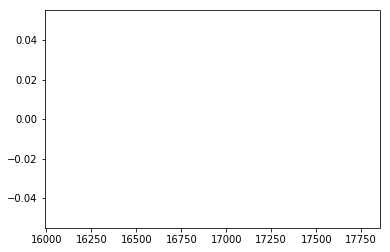

In [10]:
sns.distplot(tr_data['revol_bal'],bins=100000)

In [18]:
cols_to_drop=['mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog','verification_status_joint','desc']
train.drop(cols_to_drop,axis=1,inplace=True)
test.drop(cols_to_drop,axis=1,inplace=True)


In [179]:
train.emp_title.fillna('None',inplace=True)
train.batch_enrolled.fillna('None',inplace=True)
train.title.fillna('None',inplace=True)
train.delinq_2yrs.fillna(30,inplace=True)
train=train[train['delinq_2yrs']<12]
train.inq_last_6mths.fillna(30,inplace=True)
train=train[train['inq_last_6mths']<9]
cols_to_drop=['mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog','verification_status_joint','desc']
train.drop(cols_to_drop,axis=1,inplace=True)
cols=['pub_rec','open_acc','revol_util','total_acc','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']
for f in cols:
    train[f].fillna(train[f].mean(),inplace=True)

train=train[train['pub_rec']<=8]
train=train[train['open_acc']<=30]
train=train[train['revol_util']<=112]
train=train[train['total_acc']<=75]
train=train[train['collections_12_mths_ex_med']<=3]
train=train[train['acc_now_delinq']<=2]
train=train[train['tot_coll_amt']<=40000]
train=train[train['tot_cur_bal']<=1000000]


In [6]:
test.drop(cols_to_drop,axis=1,inplace=True)


In [19]:
Y=train['loan_status']
ID_test=test['member_id']
train.drop(['loan_status','member_id'],inplace=True,axis=1)
test.drop('member_id',axis=1,inplace=True)

In [19]:
train['emp_title'].dtype=="O"

True

In [20]:
def ftr_sep(df):
    cont_feat=[]
    category_feat=[]
    for col in df.columns:
        if df[col].dtype==np.dtype('O'):
            category_feat.append(col)
        else:
            cont_feat.append(col)
    return cont_feat,category_feat
        
cont_feat,category_feat=ftr_sep(train)

In [43]:
np.sqrt(train["pub_rec"])

/home/sanyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


0         1.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
6         1.414214
7         0.000000
8         0.000000
9         0.000000
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16        0.000000
17        0.000000
18        0.000000
19        0.000000
20        0.000000
21        0.000000
22        0.000000
23        0.000000
24        0.000000
25        0.000000
26        1.000000
27        0.000000
28        0.000000
29        0.000000
            ...   
532398    0.000000
532399    0.000000
532400    0.000000
532401    0.000000
532402    0.000000
532403    1.000000
532404    1.000000
532405    0.000000
532406    0.000000
532407    0.000000
532408    0.000000
532409    0.000000
532410    0.000000
532411    0.000000
532412    1.000000
532413    0.000000
532414    0.000000
532415    0.000000
532416    0.000000
532417    0.000000
532418    0.000000
532419    0.

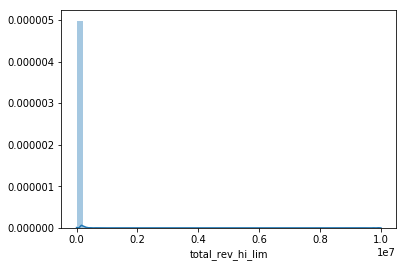

In [46]:
sns.distplot(train['total_rev_hi_lim'])

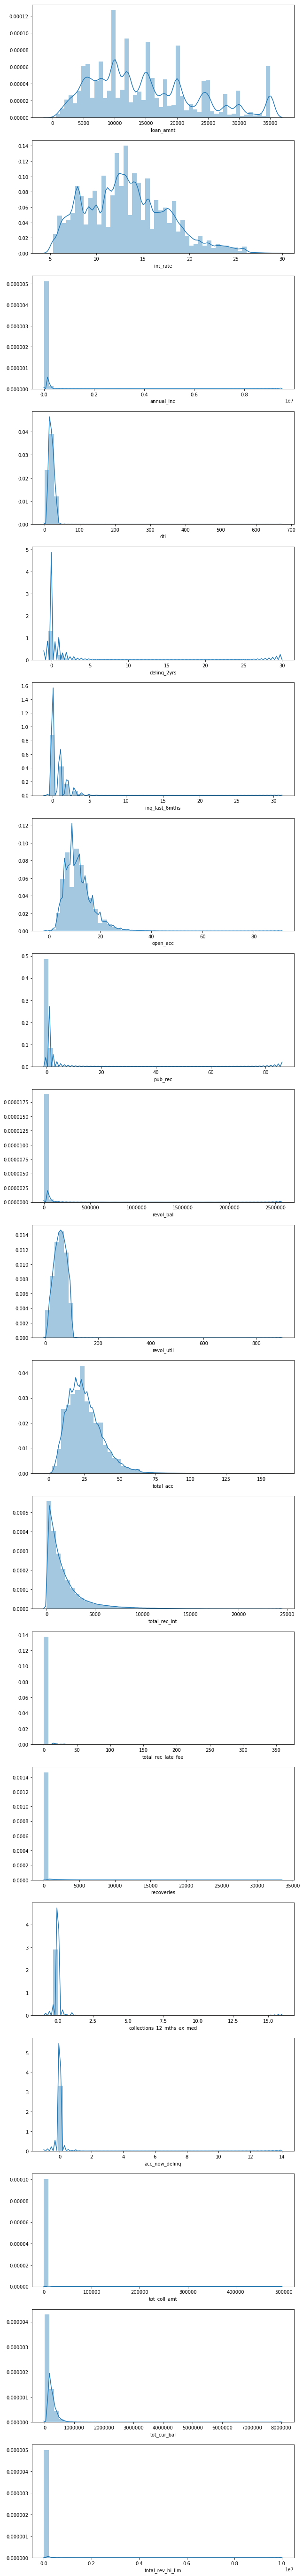

In [44]:
fig,axes=plt.subplots(len(cont_feat),figsize=(10,100))
for index,col in enumerate(cont_feat):
    sns.distplot(a=train[col],ax=axes[index])
        

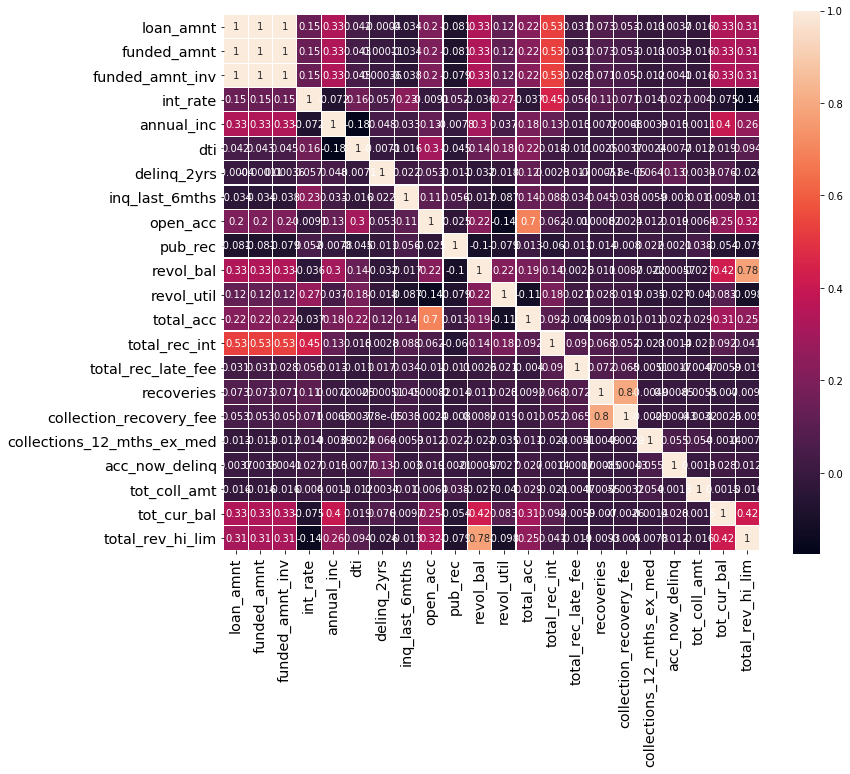

In [22]:
cor_df=train[cont_feat]
import seaborn as sns
corr=cor_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,square=True,linewidths=.15)
plt.xticks(label=cont_feat,size='x-large',rotation='vertical')
plt.yticks(y=cont_feat,size='x-large',rotation='horizontal')
plt.show()

In [10]:
category_feat

['term',
 'batch_enrolled',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type',
 'last_week_pay']

In [23]:
train['last_week_pay'].unique()

array(['26th week', '9th week', '135th week', '96th week', '113th week',
       '117th week', '78th week', '44th week', '52th week', '95th week',
       '48th week', '82th week', '35th week', '104th week', '17th week',
       '13th week', 'NAth week', '31th week', '30th week', '70th week',
       '4th week', '91th week', '65th week', '39th week', '83th week',
       '74th week', '22th week', '61th week', '156th week', '122th week',
       '174th week', '87th week', '139th week', '0th week', '57th week',
       '131th week', '152th week', '43th week', '161th week', '56th week',
       '170th week', '157th week', '109th week', '126th week',
       '100th week', '148th week', '265th week', '165th week',
       '261th week', '213th week', '222th week', '196th week',
       '130th week', '144th week', '244th week', '204th week',
       '69th week', '217th week', '143th week', '191th week', '21th week',
       '226th week', '18th week', '108th week', '79th week', '183th week',
       '178th 

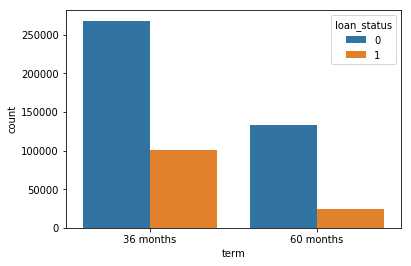

In [14]:
col='term'
sns.countplot(x=train[col],hue=Y)

In [73]:
def one(fr):
    return fr[fr['response']==1]['response'].sum()/fr.shape[0]
    

In [107]:
col='last_week_pay'
dicto={col:train[col],'response':Y}
temp=pd.DataFrame(dicto)
fr=temp.groupby(col).agg(lambda x:x[x==1].sum()/len(x))


In [108]:
fr

,response
last_week_pay,
0th week,0.871446
100th week,0.309434
104th week,0.306485
108th week,0.870968
109th week,0.266026
113th week,0.294714
117th week,0.260836
118th week,0.817391
121th week,0.843636


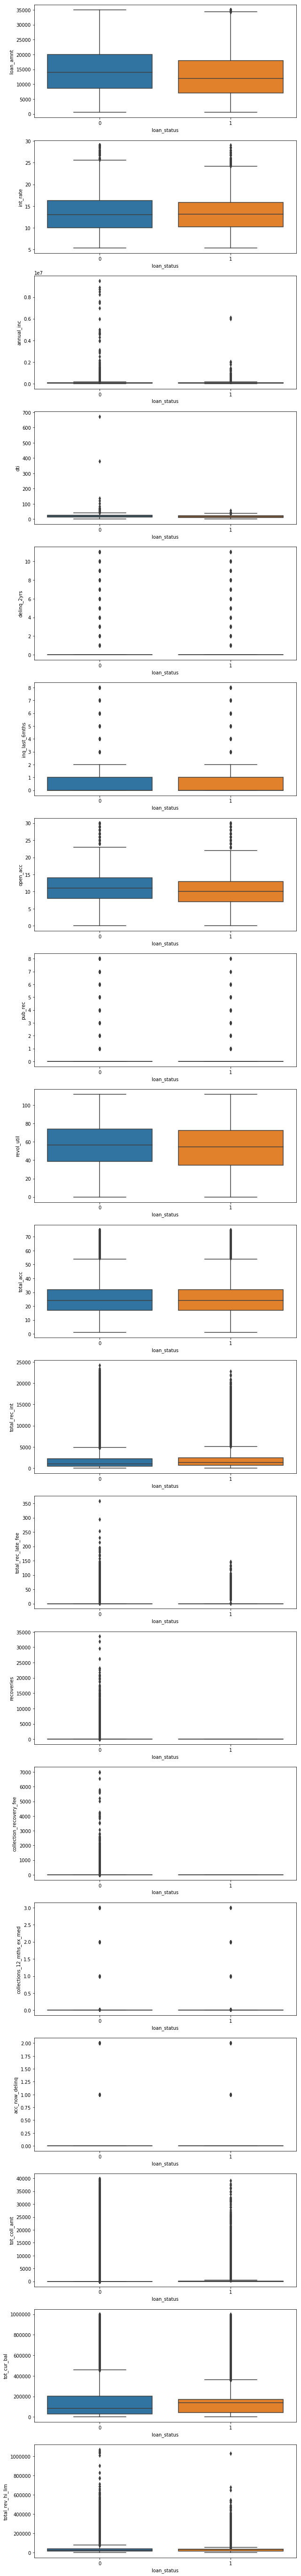

In [36]:
fig,axes=plt.subplots(len(cont_feat),figsize=(10,100))
for index,col in enumerate(cont_feat):
    sns.boxplot(y=train[col],x=Y,ax=axes[index])

In [24]:
## Dropping highly correlated features
train.drop(['funded_amnt','funded_amnt_inv'],inplace=True,axis=1)
test.drop(['funded_amnt','funded_amnt_inv'],inplace=True,axis=1)

In [25]:
train.drop(['collection_recovery_fee'],inplace=True,axis=1)
test.drop(['collection_recovery_fee'],inplace=True,axis=1)

In [26]:
Y.value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [27]:
cont_feat,category_feat=ftr_sep(train)

In [28]:
def label_bin(train,test):
    assert (train.columns==test.columns).all,'columns not matching'
    _,category_feat=ftr_sep(train)
    
    for col in category_feat:
        le = LabelEncoder()
        le.fit(list(train[col].values) + list(test[col].values))
        print(col)
        train[col] = le.transform(list(train[col]))
        test[col] = le.transform(list(test[col]))
    return train,test

In [29]:
train,test=label_bin(train,test)

term
batch_enrolled
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
pymnt_plan
purpose
title
zip_code
addr_state
initial_list_status
application_type
last_week_pay


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,Y,test_size=.3,stratify=Y,random_state=122)

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
cv=StratifiedShuffleSplit(test_size=.3,random_state=22)
from sklearn import linear_model
clf=linear_model.LassoCV(alphas=[1e-8,1e-7,1e-6,1e-5,1],cv=cv,n_jobs=-1,verbose=True,normalize=True)
clf.fit(X_train,y_train)

..................................................[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.2s finished


LassoCV(alphas=[1e-08, 1e-07, 1e-06, 1e-05, 1], copy_X=True,
    cv=StratifiedShuffleSplit(n_splits=10, random_state=22, test_size=0.3,
            train_size=None),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=-1,
    normalize=True, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=True)

In [36]:
clf.alpha_

1e-06

In [33]:
pred=clf.predict(X_test)

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred)

0.782677854162535

In [581]:
clf=linear_model.Lasso(alpha=1e-7,normalize=True)
clf.fit(X_train,y_train)
preds=clf.predict(X_test)
roc_auc_score(y_test,preds)

0.77308329582910662

In [570]:
from sklearn.feature_selection import SelectFromModel
model=SelectFromModel(clf,prefit=True)
X_train_new=model.transform(X_train)
X_test_new=model.transform(X_test)

In [37]:
alphas=[1e-8,1e-7,1e-6,1e-5,1e-3,1,2,6,10,100]
score=[]
for a in alphas:
    clf_en=linear_model.ElasticNet(alpha=a,normalize=True)
    clf.fit(X_train,y_train)
    preds=clf.predict(X_test)
    score.append(roc_auc_score(y_test,preds))


..................................................[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.6s finished
..................................................[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.6s finished
..................................................[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.3s finished
..................................................[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   23.8s finished
..................................................[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.4s finished
..................................................[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.5s finished
..................................................[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.0s finished
..................................................[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.7s finished
................................

In [39]:
score

[0.782677854162535,
 0.782677854162535,
 0.782677854162535,
 0.782677854162535,
 0.782677854162535,
 0.782677854162535,
 0.782677854162535,
 0.782677854162535,
 0.782677854162535,
 0.782677854162535]

In [ ]:
train=tr_data
test=tt_data
impute_missing(train)
impute_missing(test)


In [166]:
tr=X_train.drop('last_week_pay',axis=1)
tt=X_test.drop('last_week_pay',axis=1)


In [168]:
import lightgbm as lgb
train_data=lgb.Dataset(tr,y_train)
val=lgb.Dataset(tt,y_test)

params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary', 
          'nthread': 5, # Updated from nthread
          'num_leaves': 64, 
          'learning_rate': 0.05, 
          'max_bin': 512, 
          'subsample_for_bin': 200,
          'subsample': 1, 
          'subsample_freq': 1, 
          'colsample_bytree': 0.8, 
          'reg_alpha': 5, 
          'reg_lambda': 10,
          'min_split_gain': 0.5, 
          'min_child_weight': 1, 
          'min_child_samples': 5, 
          'scale_pos_weight': 1,
          'metric' : 'auc'}

print("training model")
clf=lgb.train(params,train_data,num_boost_round=500,valid_sets=[val,train_data],verbose_eval=20)

training model
[20]	training's auc: 0.840705	valid_0's auc: 0.839224
[40]	training's auc: 0.856744	valid_0's auc: 0.854504
[60]	training's auc: 0.87295	valid_0's auc: 0.870306
[80]	training's auc: 0.883948	valid_0's auc: 0.880896
[100]	training's auc: 0.891304	valid_0's auc: 0.887806
[120]	training's auc: 0.898572	valid_0's auc: 0.894694
[140]	training's auc: 0.905301	valid_0's auc: 0.901118
[160]	training's auc: 0.909349	valid_0's auc: 0.904962
[180]	training's auc: 0.912836	valid_0's auc: 0.908131
[200]	training's auc: 0.91507	valid_0's auc: 0.910039
[220]	training's auc: 0.917141	valid_0's auc: 0.911753
[240]	training's auc: 0.919231	valid_0's auc: 0.913587
[260]	training's auc: 0.921023	valid_0's auc: 0.915117
[280]	training's auc: 0.922461	valid_0's auc: 0.916246
[300]	training's auc: 0.923708	valid_0's auc: 0.917081
[320]	training's auc: 0.924836	valid_0's auc: 0.917944
[340]	training's auc: 0.925958	valid_0's auc: 0.918755
[360]	training's auc: 0.927241	valid_0's auc: 0.919832
[

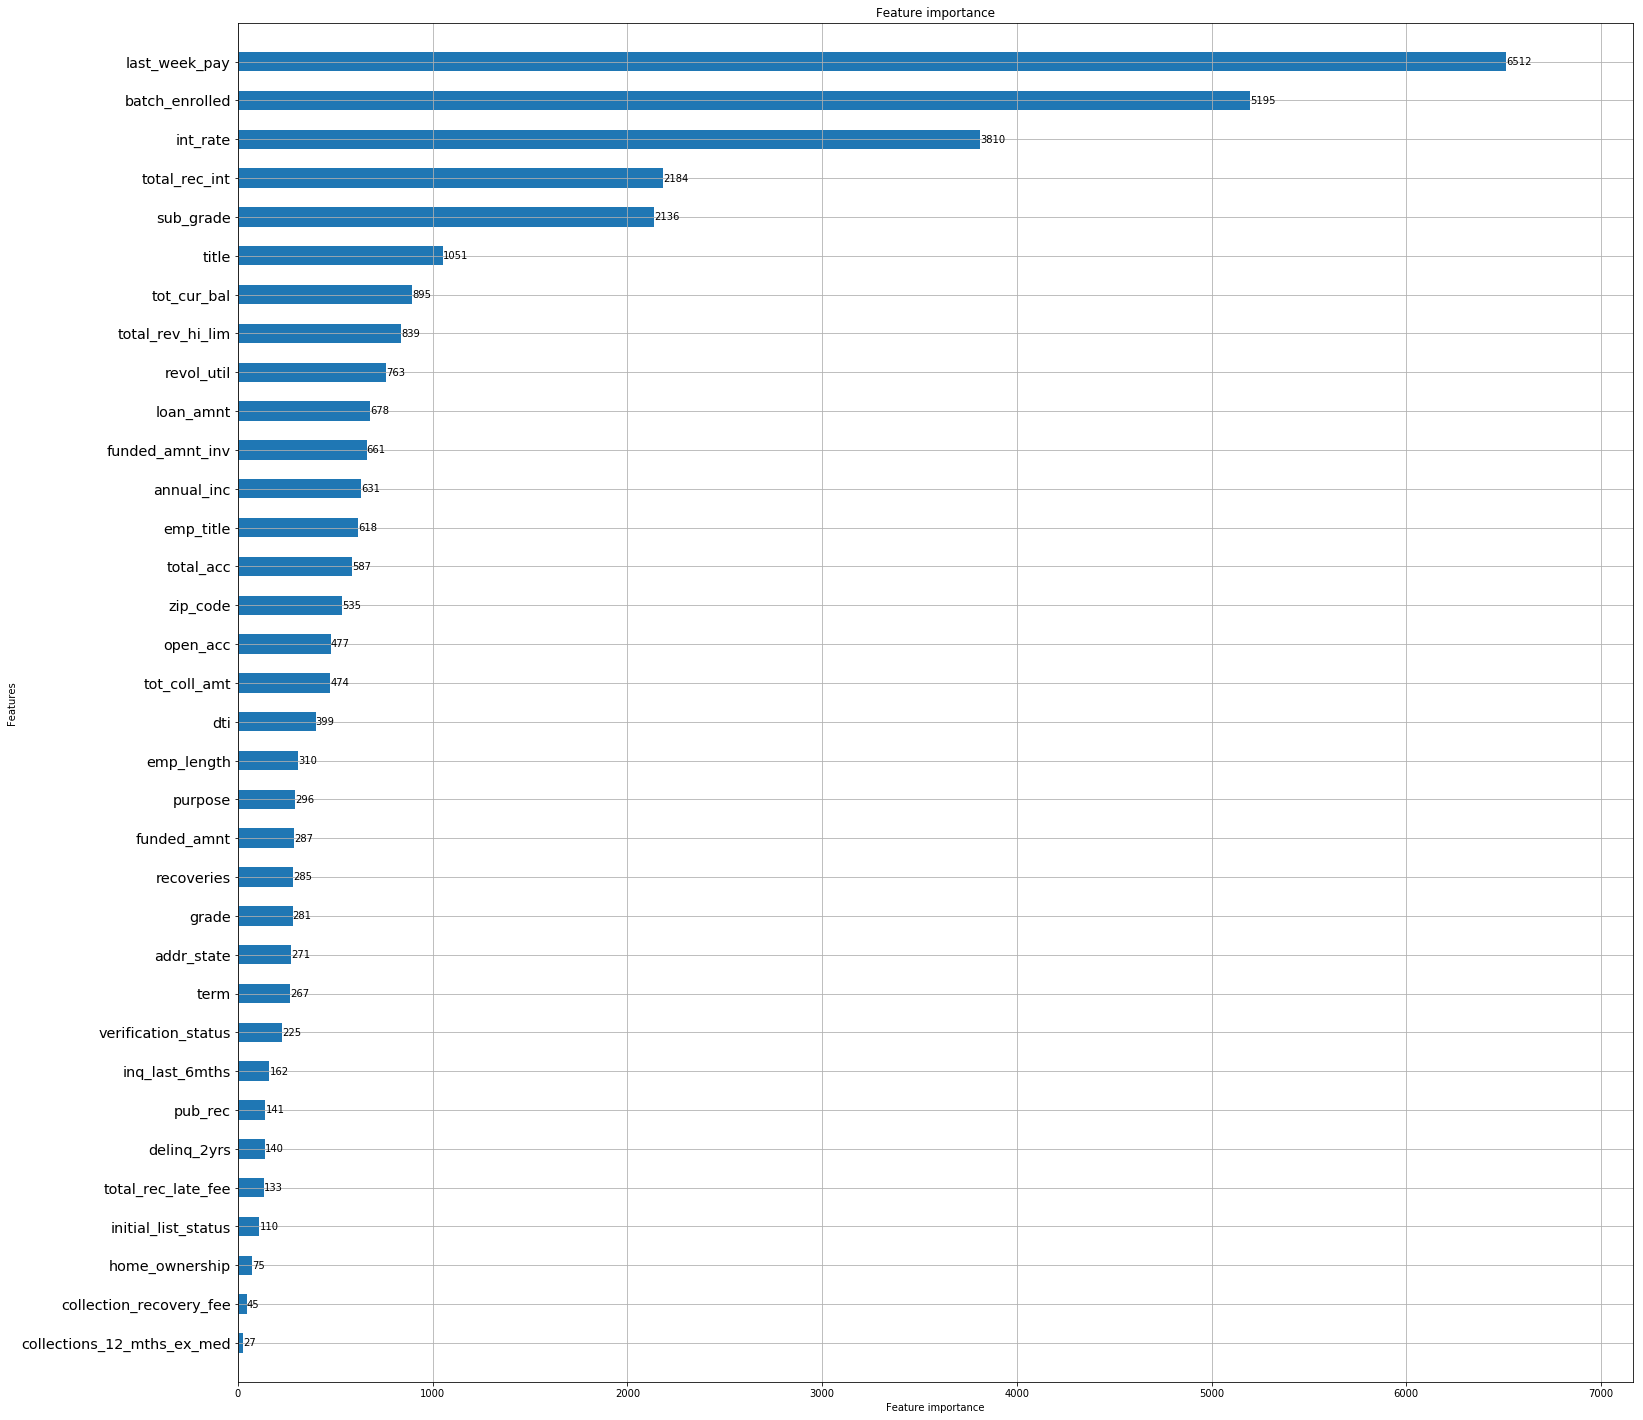

In [164]:
plt.figure(figsize=(100,100))
lgb.plot_importance(clf,figsize=(25,25),height=.5)
plt.yticks(size='x-large')
plt.show()

In [153]:
a

In [620]:
roc_auc_score(y_train,clf.predict(X_train))

0.96711915995772402

In [133]:
loan_status=clf.predict(test)
prediction=pd.DataFrame({'member_id':ID_test})
prediction['loan_status']=loan_status
prediction.to_csv('lgb_weighted.csv',index=False)

In [626]:
gridparams={'num_leaves' :[50,70,100,150],
    'learning_rate':[0.002,0.01,0.2],
    'max_depth':[8,10,-1],
    'early_stopping_rounds':40,
    'feature_fraction':0.8,
    'bagging_fraction':0.8}

In [610]:
from lightgbm import LGBMClassifier

In [137]:
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary', 
          'nthread': 5, # Updated from nthread
          'num_leaves': 64, 
          'learning_rate': 0.05, 
          'max_bin': 512, 
          'subsample_for_bin': 200,
          'subsample': 1, 
          'subsample_freq': 1, 
          'colsample_bytree': 0.8, 
          'reg_alpha': 5, 
          'reg_lambda': 10,
          'min_split_gain': 0.5, 
          'min_child_weight': 1, 
          'min_child_samples': 5, 
          'scale_pos_weight': 1,
          'metric' : 'auc',
         'feature_fraction':0.8,
        'bagging_fraction':0.8,
        'min_data_in_leaf':40}

In [141]:
estimator=lgb.LGBMClassifier(num_leaves=params['num_leaves'],max_depth=params['max_depth'],learning_rate=params['learning_rate'],n_estimators=500,objective='binary',is_unbalance=True,reg_alpha=5,reg_lambda=10,silent=False,min_split_gain=params['min_split_gain'],n_jobs=-1,metric='auc')


In [145]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator,X_test,y_test,cv=3,scoring='roc_auc',n_jobs=-1,verbose=1)

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


array([ 0.95817021,  0.96092309,  0.9588158 ])

In [144]:
scores

array([ 0.96406613,  0.96413141,  0.96393679])

In [628]:
gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

In [ ]:
from sklearn.model_selection import  GridSearchCV
grid=GridSearchCV(estimator,param_grid=gridParams,cv=2,scoring='roc_auc',n_jobs=-1,verbose=1,return_train_score=True)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 432 candidates, totalling 864 fits


Exception ignored in: <bound method Dataset.__del__ of <lightgbm.basic.Dataset object at 0x7f18ba12a748>>
Traceback (most recent call last):
  File "/home/sanyam/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py", line 627, in __del__
    def __del__(self):
KeyboardInterrupt
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.5min
